## Importing and cleaning information for the analysis

In [1]:
# Importing Libraries
import ast # To convert the skils to a list
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data (Job postings)
df = pd.read_csv(r"C:\Users\WIN10\Desktop\Job_Analysis_2025\Job_CSV\jobs_postings.csv")


# Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create the column month (data will be analyzed monthly)

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

# Filter by the year and sorting by month
df_2025 = df[df['job_posted_date'].dt.year == 2025].copy()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_2025['job_posted_month'] = pd.Categorical(
    df_2025['job_posted_month'],
    categories=month_order,
    ordered=True
)

## Filtering by Jobs Analyst Roles in Canada

In [2]:
# Get dataframe for Canada jobs in 2025 filter by Data roles

# Data Analyst
df_da_ca = df_2025[(df_2025['job_country'] == 'Canada') & (df_2025['job_title_short'] == 'Data Analyst')]

# Data Scientist
df_ds_ca = df_2025[(df_2025['job_country'] == 'Canada') & (df_2025['job_title_short'] == 'Data Scientist')]

### Finding the locations in Canada with the most offers for Data Analysts

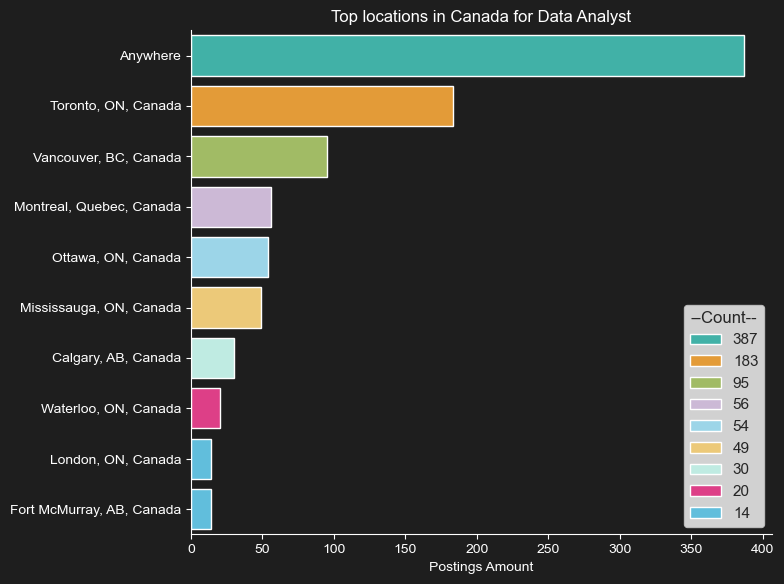

In [3]:
# Getting top locations in Canada based on job postings

df_plot_da = (df_da_ca.loc[df_da_ca['job_location'] != 'Canada', 'job_location'] # Remove the data that only shows Canada as we want the specific location
           .value_counts()
           .head(10)
           .to_frame())

dark_palette = [
    "#4cc9f0",  # cyan
    "#f72585",  # pink
    "#b8f2e6",  # mint
    "#ffd166",  # yellow
    "#90dbf4",  # sky
    "#cdb4db",  # lavender
    "#a7c957",  # lime
    "#ff9f1c",  # orange
    "#2ec4b6",  # teal
]

# Plotting the information
fig, ax = plt.subplots(figsize=(8, 6))
# Background
fig.patch.set_facecolor('#1e1e1e')
ax.set_facecolor('#1e1e1e')

# Styling
sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=df_plot_da, x='count', y='job_location', hue='count', palette=dark_palette, ax=ax)
plt.ylabel('Count', color='white')
plt.xlabel('')
plt.title('Top locations in Canada for Data Analyst', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.set_ylabel('')
ax.set_xlabel('Postings Amount', color='white')
plt.legend(title='--Count--')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='--Count--')


plt.tight_layout()
plt.show()

### Finding the locations in Canada with the most offers for Data Scientists

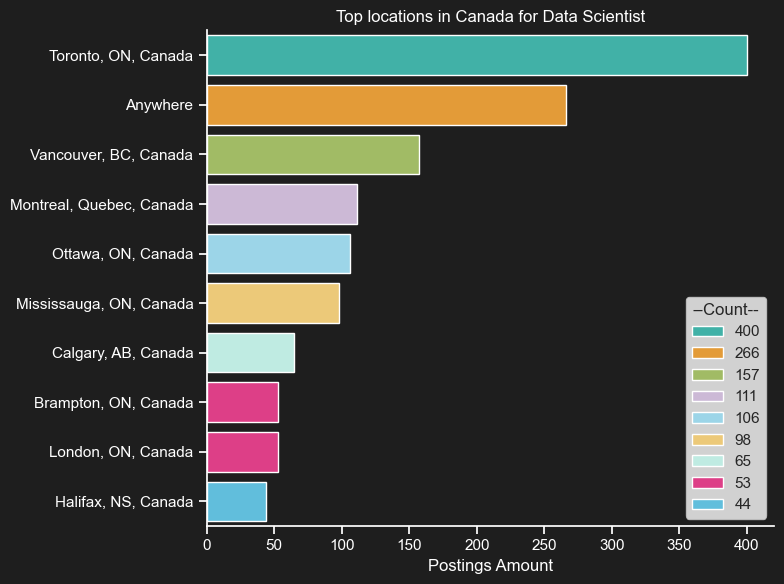

In [4]:
# Getting top locations in Canada based on job postings

df_plot_ds = (df_ds_ca.loc[df_ds_ca['job_location'] != 'Canada', 'job_location'] # Remove the data that only shows Canada as we want the specific location
              .value_counts()
              .head(10)
              .to_frame())


dark_palette = [
    "#4cc9f0",  # cyan
    "#f72585",  # pink
    "#b8f2e6",  # mint
    "#ffd166",  # yellow
    "#90dbf4",  # sky
    "#cdb4db",  # lavender
    "#a7c957",  # lime
    "#ff9f1c",  # orange
    "#2ec4b6",  # teal
]

# Plotting the information
fig, ax = plt.subplots(figsize=(8, 6))
# Background
fig.patch.set_facecolor('#1e1e1e')
ax.set_facecolor('#1e1e1e')

# Styling
sns.despine()
sns.barplot(data=df_plot_ds, x='count', y='job_location', hue='count', palette=dark_palette, ax=ax)
plt.ylabel('Count', color='white')
plt.xlabel('')
plt.title('Top locations in Canada for Data Scientist', color='white')
plt.xticks(color='white')
ax.set_ylabel('')
ax.set_xlabel('Postings Amount', color='white')
plt.yticks(color='white')
plt.legend(title='--Count--')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='--Count--')

plt.tight_layout()
plt.show()

### Checking the availability for remote jobs and the ones requesting a degree for Data Analysts

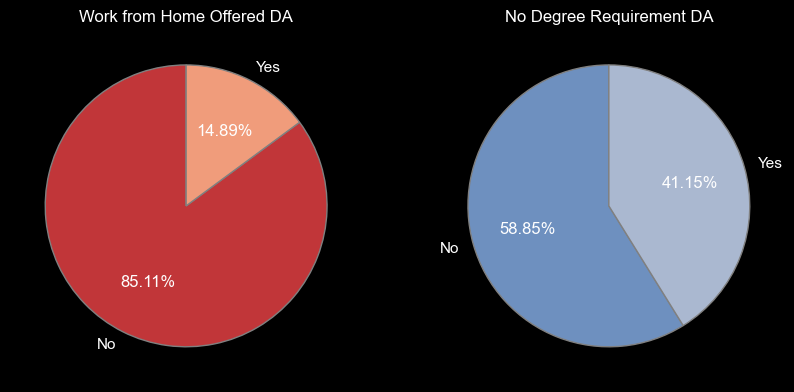

In [5]:
# Format the titles of the pie charts

pie_colums = {
    'job_work_from_home' : 'Work from Home Offered DA',
    'job_no_degree_mention' : 'No Degree Requirement DA',
}

colors = [sns.color_palette('RdBu'),sns.color_palette('vlag')]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10,6))

# Background
fig.patch.set_facecolor('black')

# Plotting the different pie charts
for i, (column, title) in enumerate(pie_colums.items()):
    ax[i].pie(df_da_ca[column].value_counts(), labels=['No', 'Yes'], colors=colors[i], autopct='%1.2f%%', startangle=90, textprops={'color':'white'}, wedgeprops={'edgecolor':'grey'})
    ax[i].set_title(title, color='white')
    ax[i].tick_params(colors='white')
    

plt.show()

### Checking the availability for remote jobs and the ones requesting a degree for Data Scientists

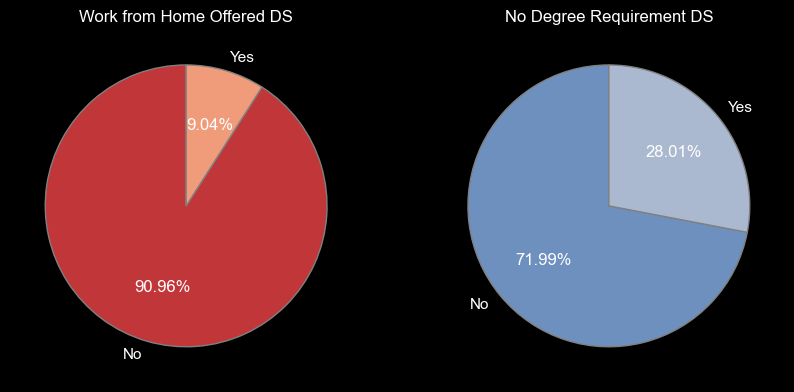

In [6]:
# Format the titles of the pie charts

pie_colums = {
    'job_work_from_home' : 'Work from Home Offered DS',
    'job_no_degree_mention' : 'No Degree Requirement DS',
}

colors = [sns.color_palette('RdBu'),sns.color_palette('vlag')]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10,6))

# Background
fig.patch.set_facecolor('black')

# Plotting the different pie charts
for i, (column, title) in enumerate(pie_colums.items()):
    ax[i].pie(df_ds_ca[column].value_counts(), labels=['No', 'Yes'], colors=colors[i], autopct='%1.2f%%', startangle=90, textprops={'color':'white'}, wedgeprops={'edgecolor':'grey'})
    ax[i].set_title(title, color='white')
    ax[i].tick_params(colors='white')
    

plt.show()

### Finding the companies with the most offers for Data Analysts

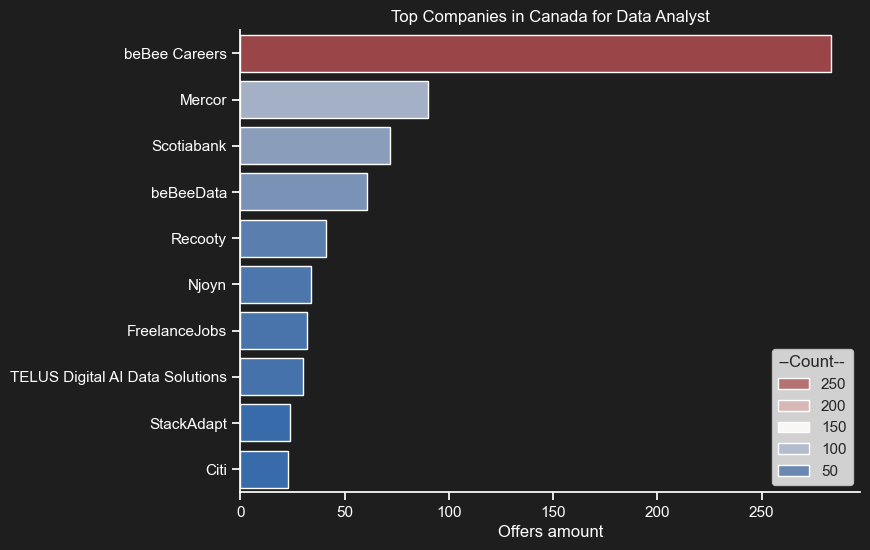

In [7]:
# Getting top locations in Canada based on job postings

df_plot_da_com = df_da_ca['company_name'].value_counts().head(10).to_frame()


# Plotting the information
fig, ax = plt.subplots(figsize=(8, 6))
# Background
fig.patch.set_facecolor('#1e1e1e')
ax.set_facecolor('#1e1e1e')

# Styling
sns.despine()
sns.barplot(data=df_plot_da_com, x='count', y='company_name', hue='count', palette='vlag', ax=ax)
plt.ylabel('Count', color='white')
plt.xlabel('')
plt.title('Top Companies in Canada for Data Analyst', color='white')
plt.xticks(color='white')
ax.set_ylabel('')
plt.yticks(color='white')
plt.legend(title='--Count--')
ax.set_xlabel('Offers amount', color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='--Count--')



plt.show()

### Finding the companies with the most offers for Data Scientists

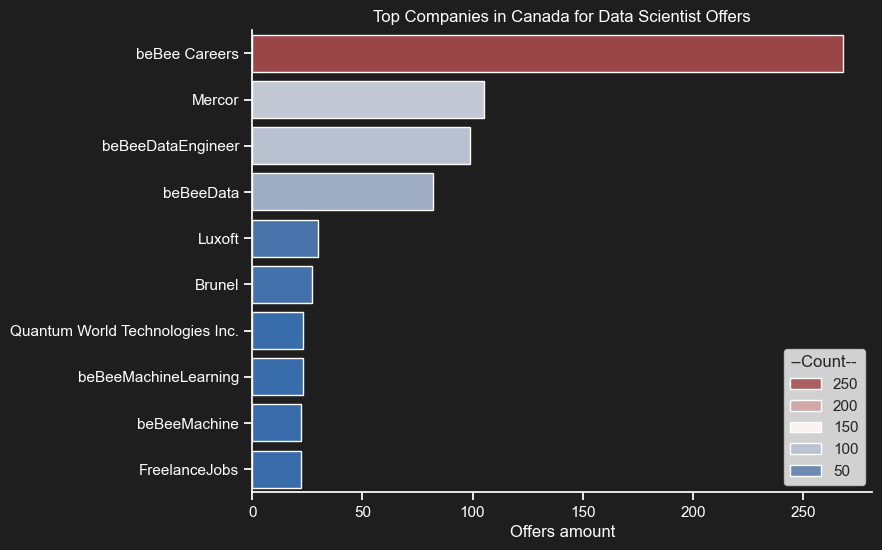

In [8]:
# Getting top locations in Canada based on job postings

df_plot_ds_com = df_ds_ca['company_name'].value_counts().head(10).to_frame()


# Plotting the information
fig, ax = plt.subplots(figsize=(8, 6))
# Background
fig.patch.set_facecolor('#1e1e1e')
ax.set_facecolor('#1e1e1e')

# Styling
sns.despine()
sns.barplot(data=df_plot_ds_com, x='count', y='company_name', hue='count', palette='vlag', ax=ax)
plt.ylabel('Count', color='white')
plt.xlabel('')
plt.title('Top Companies in Canada for Data Scientist Offers', color='white')
plt.xticks(color='white')
ax.set_ylabel('')
ax.set_xlabel('Offers amount', color='white')
plt.yticks(color='white')
plt.legend(title='--Count--')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='--Count--')



plt.show()